In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv("C:/Users/rajgo/Downloads/red_wine.csv")
data2 = pd.read_csv("C:/Users/rajgo/Downloads/white_wine.csv")

In [3]:
data1

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low
...,...,...,...,...
566,0.40,0.70,12.7,low
567,0.28,0.60,12.8,high
568,0.31,0.60,12.8,high
569,0.34,0.72,12.8,low


In [4]:
data2

,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low
...,...,...,...,...
73,0.12,0.36,13.8,high
74,0.24,0.74,13.8,low
75,0.15,0.77,13.8,high
76,0.27,0.27,13.9,high


In [5]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
from ydata_profiling import ProfileReport

In [7]:
profile = ProfileReport(data1, title="Profiling Report")

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_notebook_iframe()

In [10]:
profile.to_file("C:/Users/rajgo/Downloads/homework3.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder


# Assuming 'quality' is the target column denoting high/low quality
# Encoding 'high' as 1 and 'low' as 0
label_encoder = LabelEncoder()
data1['type'] = label_encoder.fit_transform(data1['type'])

# Features and Target
X = data1.drop('type', axis=1)
y = data1['type']

# Define the models
models = {
    "Baseline": DummyClassifier(strategy='most_frequent'),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel='linear', probability=True),
    "SVM-RBF": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier()
}

# Perform 10-fold cross-validation and report accuracy and AUC for each model
for name, model in models.items():
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores_acc = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    scores_auc = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

    print(f"Model: {name}")
    print(f"Accuracy: {scores_acc.mean()}")  # Mean accuracy
    print(f"AUC: {scores_auc.mean()}")  # Mean AUC
    print("-" * 30)

Model: Baseline
Accuracy: 0.5290683605565638
AUC: 0.5
------------------------------
Model: Logistic Regression
Accuracy: 0.7881125226860254
AUC: 0.88377316461342
------------------------------
Model: Naive Bayes
Accuracy: 0.8196612220205687
AUC: 0.8983545549929317
------------------------------
Model: Decision Tree
Accuracy: 0.817816091954023
AUC: 0.8135341107617906
------------------------------
Model: SVM-Linear
Accuracy: 0.7933756805807622
AUC: 0.8827405656741203
------------------------------
Model: SVM-RBF
Accuracy: 0.5413490623109497
AUC: 0.8612413086677113
------------------------------
Model: Random Forest
Accuracy: 0.8441318814277071
AUC: 0.9277746597803735
------------------------------


In [12]:
"C:/Users/rajgo/Downloads/white_wine.csv"

'C:/Users/rajgo/Downloads/white_wine.csv'

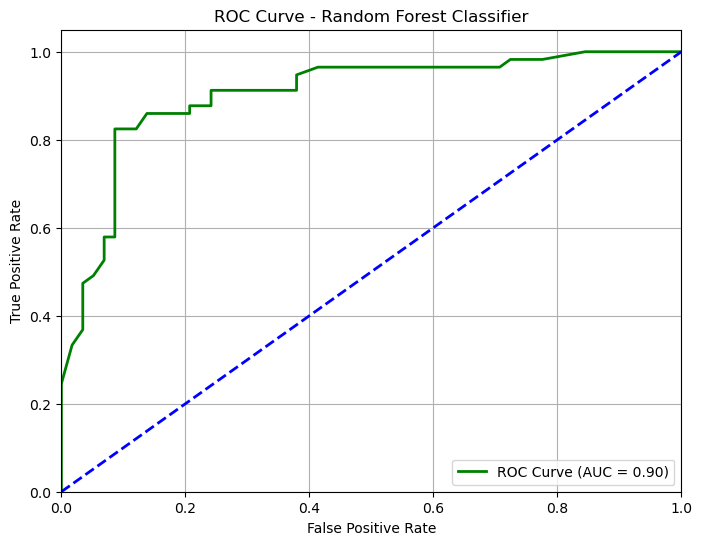

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Preprocess the data
le = LabelEncoder()
data1['type'] = le.fit_transform(data1['type'])  # Convert quality to binary labels

# Define features (X) and target (y)
X = data1.drop('type', axis=1)
y = data1['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get the predicted probabilities for the positive class
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Create the ROC curve plot without displaying it
%matplotlib inline
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='Green', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='Blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid()

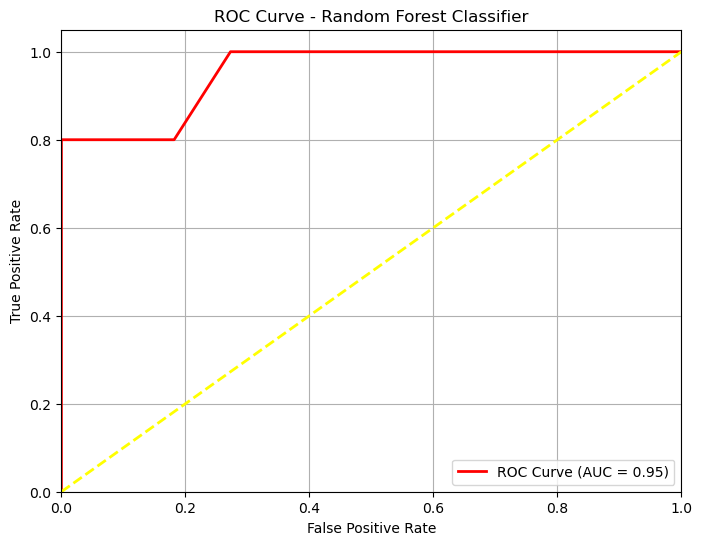

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Preprocess the data
le = LabelEncoder()
data2['type'] = le.fit_transform(data2['type'])  # Convert quality to binary labels

# Define features (X) and target (y)
X = data2.drop('type', axis=1)
y = data2['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get the predicted probabilities for the positive class
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Create the ROC curve plot without displaying it
%matplotlib inline
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid()

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder


# Assuming 'quality' is the target column denoting high/low quality
# Encoding 'high' as 1 and 'low' as 0
label_encoder = LabelEncoder()
data1['type'] = label_encoder.fit_transform(data1['type'])

# Features and Target
X = data2.drop('type', axis=1)
y = data2['type']

# Define the models
models = {
    "Baseline": DummyClassifier(strategy='most_frequent'),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel='linear', probability=True),
    "SVM-RBF": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier()
}

# Perform 10-fold cross-validation and report accuracy and AUC for each model
for name, model in models.items():
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores_acc = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    scores_auc = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

    print(f"Model: {name}")
    print(f"Accuracy: {scores_acc.mean()}")  # Mean accuracy
    print(f"AUC: {scores_auc.mean()}")  # Mean AUC
    print("-" * 30)

Model: Baseline
Accuracy: 0.7839285714285713
AUC: 0.5
------------------------------
Model: Logistic Regression
Accuracy: 0.8625
AUC: 0.9354166666666668
------------------------------
Model: Naive Bayes
Accuracy: 0.9107142857142858
AUC: 0.9875
------------------------------
Model: Decision Tree
Accuracy: 0.9125
AUC: 0.8720238095238095
------------------------------
Model: SVM-Linear
Accuracy: 0.8625
AUC: 0.94375
------------------------------
Model: SVM-RBF
Accuracy: 0.7839285714285713
AUC: 0.6901785714285714
------------------------------
Model: Random Forest
Accuracy: 0.9125
AUC: 0.9541666666666668
------------------------------
